# Importings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import MDP
import RL

# Maze

## Problem Definition

In [ ]:
''' Construct a simple maze MDP

  Grid world layout:
array([3, 3, 3, 1, 
        3, 3, 3, 1, 
        0, 3, 3, 1, 
        3, 3, 3, 0, 1])

  ---------------------
  |  0 |  1 |  2 |  3 |
  ---------------------
  |  4 |  5 |  6 |  7 |
  ---------------------
  |  8 |  9 | 10 | 11 |
  ---------------------
  | 12 | 13 | 14 | 15 |
  ---------------------

  Goal state: 15 
  Bad state: 9
  End state: 16

  The end state is an absorbing state that the agent transitions 
  to after visiting the goal state.

  There are 17 states in total (including the end state) 
  and 4 actions (up, down, left, right).
  
  Actions:
            0
          2   3
            1
  '''


# Transition function: |A| x |S| x |S'| array
T = np.zeros([4,17,17])
a = 0.8;  # intended move
b = 0.1;  # lateral move

# up (a = 0)

T[0,0,0] = a+b;
T[0,0,1] = b;

T[0,1,0] = b;
T[0,1,1] = a;
T[0,1,2] = b;

T[0,2,1] = b;
T[0,2,2] = a;
T[0,2,3] = b;

T[0,3,2] = b;
T[0,3,3] = a+b;

T[0,4,4] = b;
T[0,4,0] = a;
T[0,4,5] = b;

T[0,5,4] = b;
T[0,5,1] = a;
T[0,5,6] = b;

T[0,6,5] = b;
T[0,6,2] = a;
T[0,6,7] = b;

T[0,7,6] = b;
T[0,7,3] = a;
T[0,7,7] = b;

T[0,8,8] = b;
T[0,8,4] = a;
T[0,8,9] = b;

T[0,9,8] = b;
T[0,9,5] = a;
T[0,9,10] = b;

T[0,10,9] = b;
T[0,10,6] = a;
T[0,10,11] = b;

T[0,11,10] = b;
T[0,11,7] = a;
T[0,11,11] = b;

T[0,12,12] = b;
T[0,12,8] = a;
T[0,12,13] = b;

T[0,13,12] = b;
T[0,13,9] = a;
T[0,13,14] = b;

T[0,14,13] = b;
T[0,14,10] = a;
T[0,14,15] = b;

T[0,15,16] = 1;
T[0,16,16] = 1;

# down (a = 1)

T[1,0,0] = b;
T[1,0,4] = a;
T[1,0,1] = b;

T[1,1,0] = b;
T[1,1,5] = a;
T[1,1,2] = b;

T[1,2,1] = b;
T[1,2,6] = a;
T[1,2,3] = b;

T[1,3,2] = b;
T[1,3,7] = a;
T[1,3,3] = b;

T[1,4,4] = b;
T[1,4,8] = a;
T[1,4,5] = b;

T[1,5,4] = b;
T[1,5,9] = a;
T[1,5,6] = b;

T[1,6,5] = b;
T[1,6,10] = a;
T[1,6,7] = b;

T[1,7,6] = b;
T[1,7,11] = a;
T[1,7,7] = b;

T[1,8,8] = b;
T[1,8,12] = a;
T[1,8,9] = b;

T[1,9,8] = b;
T[1,9,13] = a;
T[1,9,10] = b;

T[1,10,9] = b;
T[1,10,14] = a;
T[1,10,11] = b;

T[1,11,10] = b;
T[1,11,15] = a;
T[1,11,11] = b;

T[1,12,12] = a+b;
T[1,12,13] = b;

T[1,13,12] = b;
T[1,13,13] = a;
T[1,13,14] = b;

T[1,14,13] = b;
T[1,14,14] = a;
T[1,14,15] = b;

T[1,15,16] = 1;
T[1,16,16] = 1;

# left (a = 2)

T[2,0,0] = a+b;
T[2,0,4] = b;

T[2,1,1] = b;
T[2,1,0] = a;
T[2,1,5] = b;

T[2,2,2] = b;
T[2,2,1] = a;
T[2,2,6] = b;

T[2,3,3] = b;
T[2,3,2] = a;
T[2,3,7] = b;

T[2,4,0] = b;
T[2,4,4] = a;
T[2,4,8] = b;

T[2,5,1] = b;
T[2,5,4] = a;
T[2,5,9] = b;

T[2,6,2] = b;
T[2,6,5] = a;
T[2,6,10] = b;

T[2,7,3] = b;
T[2,7,6] = a;
T[2,7,11] = b;

T[2,8,4] = b;
T[2,8,8] = a;
T[2,8,12] = b;

T[2,9,5] = b;
T[2,9,8] = a;
T[2,9,13] = b;

T[2,10,6] = b;
T[2,10,9] = a;
T[2,10,14] = b;

T[2,11,7] = b;
T[2,11,10] = a;
T[2,11,15] = b;

T[2,12,8] = b;
T[2,12,12] = a+b;

T[2,13,9] = b;
T[2,13,12] = a;
T[2,13,13] = b;

T[2,14,10] = b;
T[2,14,13] = a;
T[2,14,14] = b;

T[2,15,16] = 1;
T[2,16,16] = 1;

# right (a = 3)

T[3,0,0] = b;
T[3,0,1] = a;
T[3,0,4] = b;

T[3,1,1] = b;
T[3,1,2] = a;
T[3,1,5] = b;

T[3,2,2] = b;
T[3,2,3] = a;
T[3,2,6] = b;

T[3,3,3] = a+b;
T[3,3,7] = b;

T[3,4,0] = b;
T[3,4,5] = a;
T[3,4,8] = b;

T[3,5,1] = b;
T[3,5,6] = a;
T[3,5,9] = b;

T[3,6,2] = b;
T[3,6,7] = a;
T[3,6,10] = b;

T[3,7,3] = b;
T[3,7,7] = a;
T[3,7,11] = b;

T[3,8,4] = b;
T[3,8,9] = a;
T[3,8,12] = b;

T[3,9,5] = b;
T[3,9,10] = a;
T[3,9,13] = b;

T[3,10,6] = b;
T[3,10,11] = a;
T[3,10,14] = b;

T[3,11,7] = b;
T[3,11,11] = a;
T[3,11,15] = b;

T[3,12,8] = b;
T[3,12,13] = a;
T[3,12,12] = b;

T[3,13,9] = b;
T[3,13,14] = a;
T[3,13,13] = b;

T[3,14,10] = b;
T[3,14,15] = a;
T[3,14,14] = b;

T[3,15,16] = 1;
T[3,16,16] = 1;

# Reward function: |A| x |S| array
R = -1 * np.ones([4,17]);

# set rewards
R[:,15] = 100;  # goal state
R[:,9] = -70;   # bad state
R[:,16] = 0;    # end state

# Discount factor: scalar in [0,1)
discount = 0.95

# MDP object
mdp = MDP.MDP(T,R,discount)

# RL problem
rlProblem = RL.RL(mdp,np.random.normal)

## Plot R graph

Trial 0 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 1 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 2 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 3 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 4 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 5 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 6 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 7 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 8 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 9 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 10 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 11 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 12 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 13 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 14 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 15 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 16 started --- 
Episode: 0
Episode: 90
Episode: 180
Trial 17 started --- 
Ep

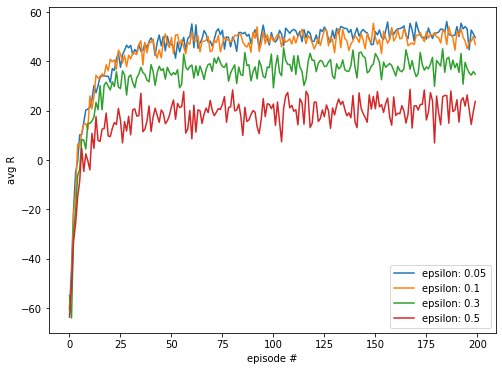

In [ ]:
# Config
nTrials = 100
nEpisodes = 200
nSteps = 100

# Declare variables
rewardsTrialEpisode = np.zeros((nTrials, nEpisodes))
policyEpsilon = np.zeros((4, rlProblem.mdp.nStates))
QVector = np.zeros((4, rlProblem.mdp.nActions, rlProblem.mdp.nStates))

# learn and plot
plt.figure(figsize=(8, 6))
for iterId, epsilon in enumerate([0.05, 0.1, 0.3, 0.5]):
    QVectorTrial = np.zeros((nTrials, rlProblem.mdp.nActions, rlProblem.mdp.nStates))
    for trialId in range(nTrials):
        print("Trial {} started --- ".format(trialId))
        [Q,policy,rewards] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=nEpisodes,nSteps=nSteps,epsilon=epsilon)
        # Capture the reward and policy in this trial
        rewardsTrialEpisode[trialId] = rewards
        QVectorTrial[trialId] = Q
    # Take avg between trials, capture, and plot
    QVector[iterId] = np.mean(QVectorTrial, axis=0)
    rewardsEpsilon = np.mean(rewardsTrialEpisode, axis=0)
    policyEpsilon[iterId] = policy
    plt.plot(rewardsEpsilon, label="epsilon: {}".format(epsilon))

plt.legend()
plt.xlabel("episode #")
plt.ylabel("avg R")
plt.show()

## Investigate Q and policy

epsilon: 0.05 
policy:  [3. 1. 1. 2. 3. 3. 3. 1. 2. 3. 3. 1. 3. 1. 2. 0. 2.]
epsilon: 0.1 
policy:  [3. 3. 3. 1. 3. 0. 1. 1. 2. 3. 3. 1. 1. 3. 0. 0. 2.]
epsilon: 0.3 
policy:  [1. 3. 1. 1. 1. 3. 1. 1. 1. 1. 3. 1. 3. 3. 3. 3. 3.]
epsilon: 0.5 
policy:  [3. 3. 3. 1. 0. 3. 1. 1. 0. 3. 3. 1. 3. 3. 3. 0. 0.]


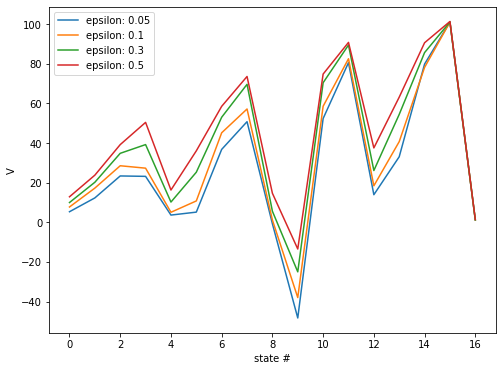

In [ ]:
# Instead of discussing Q, I discuss V (highest value of Q regard to the action)
epsilon = {0: 0.05, 1: 0.1, 2: 0.3, 3: 0.5}
plt.figure(figsize=(8, 6))
for iterId, val in enumerate(np.max(QVector, axis=1)):
    plt.plot(val, label="epsilon: {}".format(epsilon[iterId]))
    print("epsilon:", epsilon[iterId], "\npolicy: ", policyEpsilon[iterId])
plt.legend()
plt.xlabel("state #")
plt.ylabel("V")
plt.show()

## Discussion

 The figure at the end of the previous cell depicts the fact that the smaller the epsilon is, the larger the avg acumulated discounted reward will be. This is because with more chance of exploration, the agent won't leverage its prior knowledge, and does not necessarily selects the best action to acheive higher and higher reward. On the other hand, when there is a chance of exploration, and we explot most of the time, in the long run, we will find the best actions in each state, and take advantage of it to get higher rewards. In other words, with larger epsilon, the agent will be away from the optimal path, so the reward will not be that high, but when the epsilon is small, the agent will stick to the optimal path, and the cumulative reward will increase.

 In another perspective, investigating the resultant V and policy, one can observe that when epsilon is larger, corresponding V is larger too. This is quite intersting because it's in contrst to what we saw in avg R. This is because with more chance of exploration, we will eventually find the best route and the best route is considered in the Q (not the random exploration).  